In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
from utils.generators import gen_shapes, gen_noise, gen_image, gen_details
from utils.helpers import gen_grid_image

rnd=np.random.default_rng(31)


In [2]:
num_images=2

num_shapes=50
max_radius=1/20
min_radius=1/40

num_noise=500
max_line=1/10
min_line=1/80

im_size=1024
max_lw=0.5
min_lw=0.1

radius = int(max_radius*im_size)+1
detail_im_size = 2*radius+1

fluct=0

In [3]:
images = []
labels = []
details = []
boxes = []

for i in range(num_images) :
    shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
    noise = gen_noise(rnd, num_noise, max_line, min_line)
    img, sha, nse, box = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)
    focus = gen_details(detail_im_size, sha, img, rnd, fluct)
    images.append(img)
    labels.append(sha)
    details.append(focus)
    boxes.append(box)

plt.close()

np.savez_compressed('data/data.npz', images=images, labels=labels, details=details, boxes=boxes)

In [4]:
loaded  = np.load('data/data.npz')
images = loaded['images']
labels = loaded['labels']
details = loaded['details']
boxes = loaded['boxes']

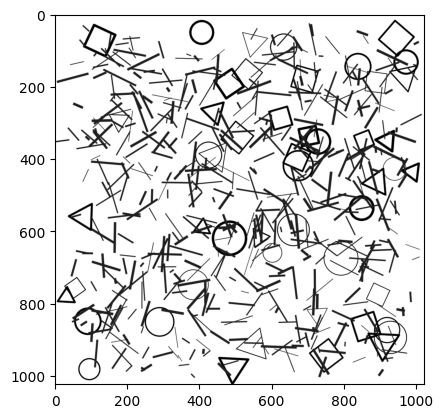

In [5]:
image=images[0]

fig = plt.figure(figsize=(image.shape[1],image.shape[0]),dpi=1)
fig.figimage(image, cmap='gray')
fig.savefig('data/tmp_image.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_image.png'))

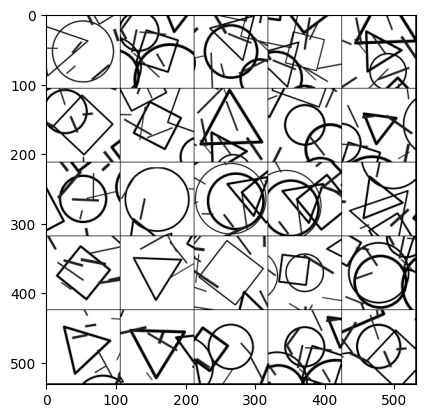

In [13]:
image=images[0]
detail=details[0]

grid = (5,5)
grid_image, grid_pos = gen_grid_image(detail, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_grid.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_grid.png'))

In [14]:
label=labels[0]

print("\nposition : shape : [pos_x, pos_y, size, rotation, line_width]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {int(label[i][0])} {label[i][1:]}")


position : shape : [pos_x, pos_y, size, rotation, line_width]
(0, 0) : 2 [482.077  54.266  43.727   0.      0.124]
(0, 1) : 4 [242.612 243.749  33.684   0.476   0.191]
(0, 2) : 2 [641.595 288.199  37.531   0.      0.259]
(0, 3) : 4 [683.587 326.52   32.473   0.536   0.104]
(0, 4) : 3 [177.13  738.85   33.17    0.557   0.237]
(1, 0) : 4 [481.243 378.631  42.568   0.031   0.168]
(1, 1) : 4 [470.889 701.043  35.582   0.307   0.216]
(1, 2) : 3 [187.152 777.087  50.575   0.034   0.298]
(1, 3) : 2 [532.575 655.838  28.419   0.      0.218]
(1, 4) : 3 [270.722 298.251  27.031   0.912   0.272]
(2, 0) : 2 [556.3   271.703  33.149   0.      0.235]
(2, 1) : 2 [742.437 978.09   45.566   0.      0.176]
(2, 2) : 2 [ 98.067 600.902  50.638   0.      0.107]
(2, 3) : 3 [125.427 610.071  34.391   1.216   0.212]
(2, 4) : 3 [721.45  917.224  35.007   0.376   0.201]
(3, 0) : 4 [611.835  62.656  38.228   0.109   0.221]
(3, 1) : 3 [ 54.271 209.912  39.586   1.009   0.188]
(3, 2) : 4 [351.657 777.644  46.583 

In [15]:
box=boxes[0]

print("\nposition : [x_min, x_max, y_min, y_max]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {box[i]}")


position : [x_min, x_max, y_min, y_max]
(0, 0) : [438.35  525.805  10.539  97.993]
(0, 1) : [212.672 272.552 213.809 273.688]
(0, 2) : [604.064 679.125 250.668 325.73 ]
(0, 3) : [655.674 711.5   298.607 354.433]
(0, 4) : [159.604 210.281 709.592 767.012]
(1, 0) : [438.695 523.791 336.083 421.179]
(1, 1) : [436.972 504.807 667.125 734.961]
(1, 2) : [144.24  231.788 750.321 827.633]
(1, 3) : [504.156 560.994 627.419 684.257]
(1, 4) : [249.356 295.745 271.468 314.809]
(2, 0) : [523.151 589.449 238.554 304.852]
(2, 1) : [ 696.871  788.003  932.524 1023.656]
(2, 2) : [ 47.428 148.705 550.263 651.54 ]
(2, 3) : [ 93.179 151.901 576.168 632.022]
(2, 4) : [699.682 756.077 889.808 949.784]
(3, 0) : [573.834 649.836  24.655 100.657]
(3, 1) : [ 20.768  89.284 170.355 230.999]
(3, 2) : [305.47  397.843 731.458 823.83 ]
(3, 3) : [358.393 412.174 906.749 960.531]
(3, 4) : [133.617 219.443 178.735 264.562]
(4, 0) : [815.942 882.089 281.876 349.154]
(4, 1) : [814.502 892.025 544.769 613.13 ]
(4, 2) : 